<a href="https://colab.research.google.com/github/fredriklilja/stats/blob/main/lumbar_spine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Risk of a missed injury after trauma CT
###A Bayesian Approach


In a discussion of the safety of discharging patients with isolated lumbar spine injury from the emergency department (ED) after a motor vehicle accident (MVA) following an otherwise clean trauma CT one position that was put forward was that due to the high sensitivity of a trauma CT it was perfectly safe to do so.

There are few recommendations in the literature as to how to observe patients after trauma CT. On the other hand, there is some data on both injury prevalence and the sensitivity of trauma CT.

Bayesian statistics can be used to estimate the risk of an undetected intraabdominal injury (IAI) based on available data.

This example should be viewed as a demonstration of bayesian reasoning in clinical practice and not as a recommandation as how to deal with observation of trauma patients.

What we want to know is the probability of an intraabdominal injury given a CT showing a lumbar fracture and nothing else. Or in mathematical notation:

$$ p(IAI|clean CT) $$

This can be caluculated using Bayes' theorem:

$$ p(IAI|clean CT) \propto p(clean CT|IAI)p(IAI) $$

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import beta

def normalize(arr):
  return arr / arr.sum()

def credibility_interval(x, pdf, credibility_level=0.95):
    # Step 1: Normalize the pdf
    pdf = pdf / np.sum(pdf)

    # Step 2: Sort x according to pdf, highest to lowest
    sorted_indices = np.argsort(pdf)[::-1]
    sorted_pdf = pdf[sorted_indices]
    sorted_x = x[sorted_indices]

    # Step 3: Accumulate the probability
    cumulative = np.cumsum(sorted_pdf)

    # Find which points to include
    indices_to_include = cumulative <= credibility_level

    # Step 4: Get the range
    included_x = sorted_x[indices_to_include]

    # Return min and max as interval
    lower_bound = np.min(included_x)
    upper_bound = np.max(included_x)

    return lower_bound, upper_bound

%config InlineBackend.figure_format = 'retina'  # high resolution figures


### Defining a prior probability

The first step is to make an educated assumtion on the prevalence of IAI in patients with lumbar spine injuries following MVA. *Rabinovici et al.* (1) published data from Philadeplphia in 1999. Of 76 patients in MVA with lumbar spine injury 19 (25%) had IAI.

We can state that $ p(IAI) = 0.25 $

Or, to account for statistical uncertainty we can represent it with a beta distribution: $$ p(IAI) \sim Beta(19, 76) $$

And if we plot the probability distribution it looks like this:

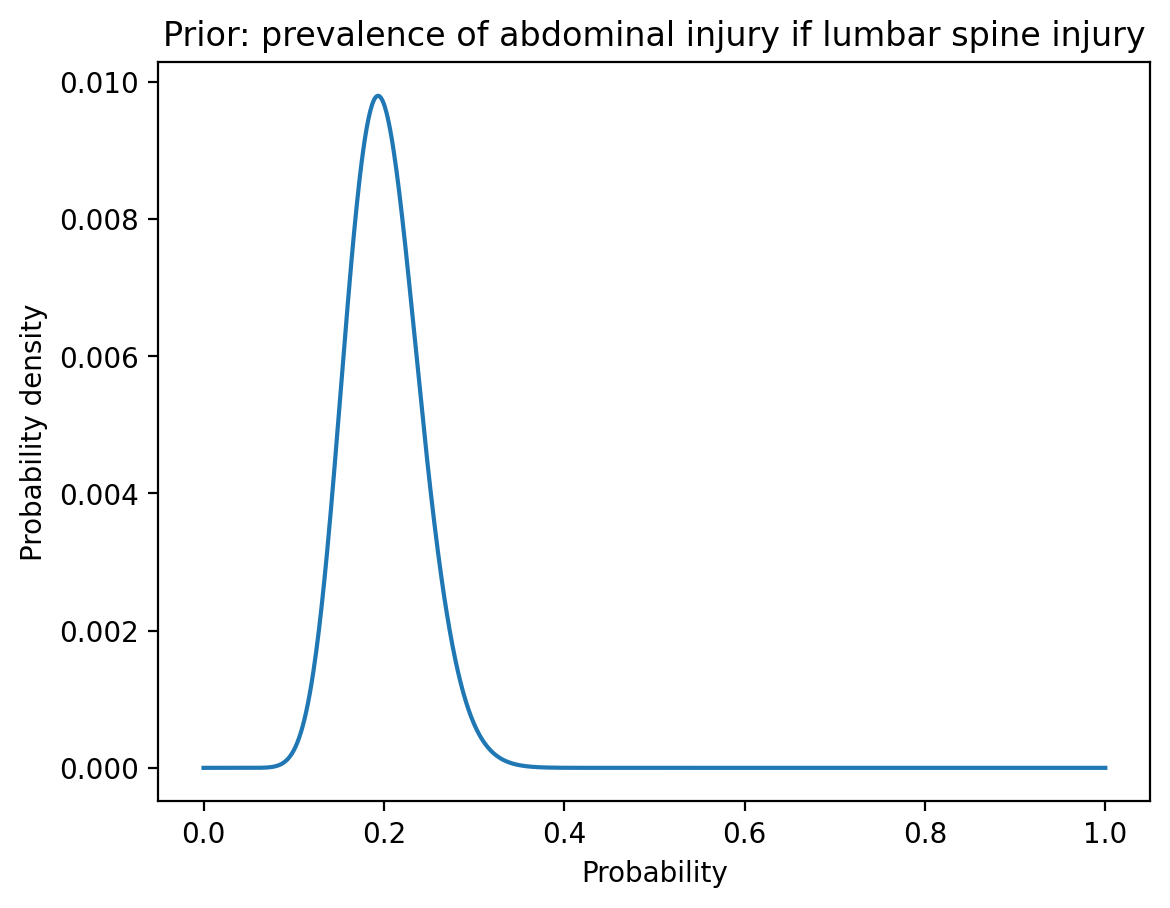

In [183]:
xs = np.linspace(0, 1, 1001)

prior_iai = beta(19, 76)
prior = normalize(prior_iai.pdf(xs))

plt.plot(xs, prior)

plt.xlabel('Probability')
plt.ylabel('Probability density')
plt.title('Prior: prevalence of abdominal injury if lumbar spine injury')

plt.show()

### Defining the likelihood

The likelihood in Bayes' theorem is the probability of a clean CT if the patient is in fact injuried. This is the same as $ 1 - sensitivity $.

From tabel 3 in *Yoong et al.* (2) we get the information that trauma CT missed 7/149 (5%) abdominal injuries: $$p(clean CT | IAI) \sim Beta(7, 149)$$

And the probability distribution for the likelihood looks like this:

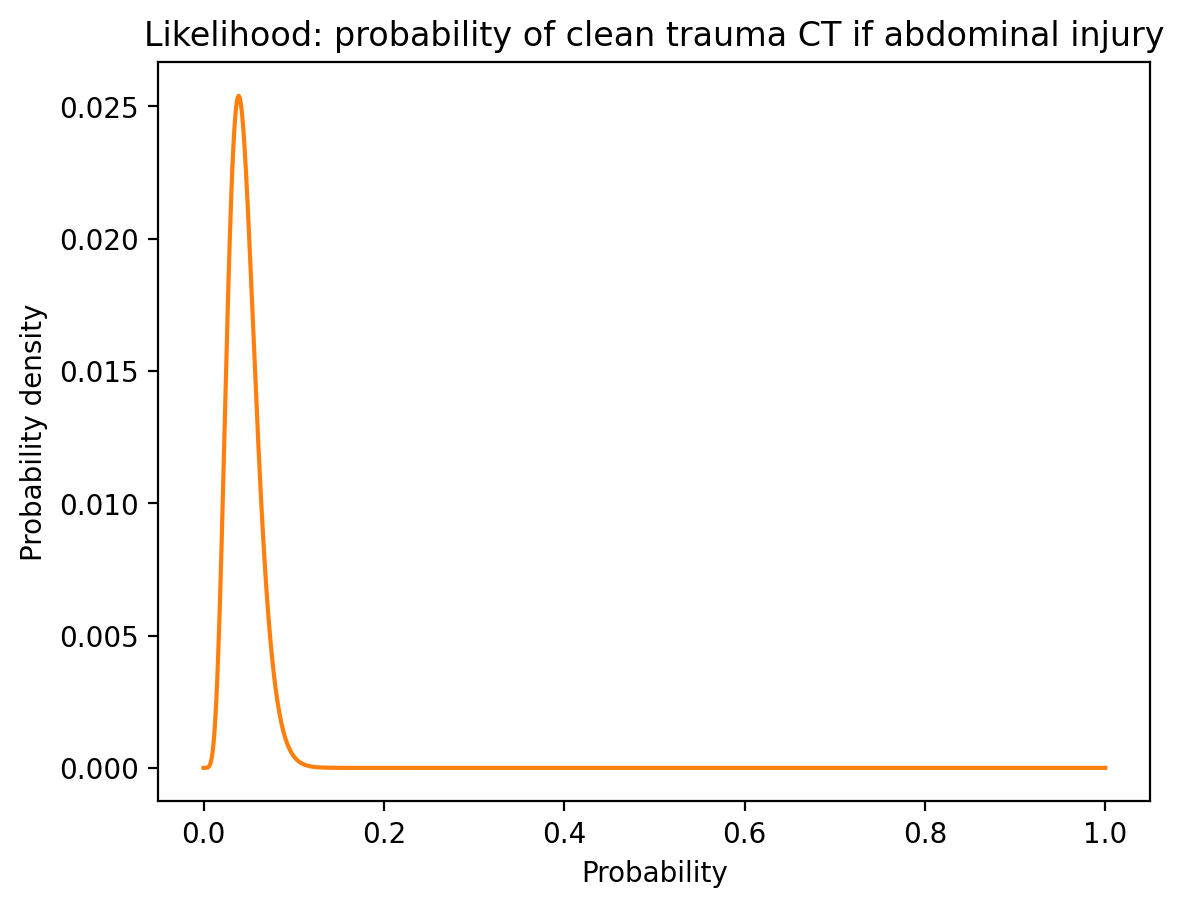

In [184]:
likelihood = normalize(beta(7, 149).pdf(xs))
plt.plot(xs, likelihood, label='Likelihood', color='C1')
plt.xlabel('Probability')
plt.ylabel('Probability density')
plt.title('Likelihood: probability of clean trauma CT if abdominal injury')

plt.show()

### Calculating the posterior

Now when we hava a prior and a likelihood we can use Bayes' theorem to calculate the posterior which in this case is the false negative rate, * i. e* the probability of having un injury given a clean CT: $ p(IAI | clean CT) $.

We plot the prior, likelihood and posterior in the same figure. As you see the likelihood "drags" the posterior from the prior towards itself.

In [185]:
print(f'Posterior mean: {posterior_mean.round(2)} 95% credibility interval: {credibility_interval(xs, posterior)[0]} - {credibility_interval(xs, posterior)[1]}')

Posterior mean: 0.1 95% credibility interval: 0.065 - 0.137


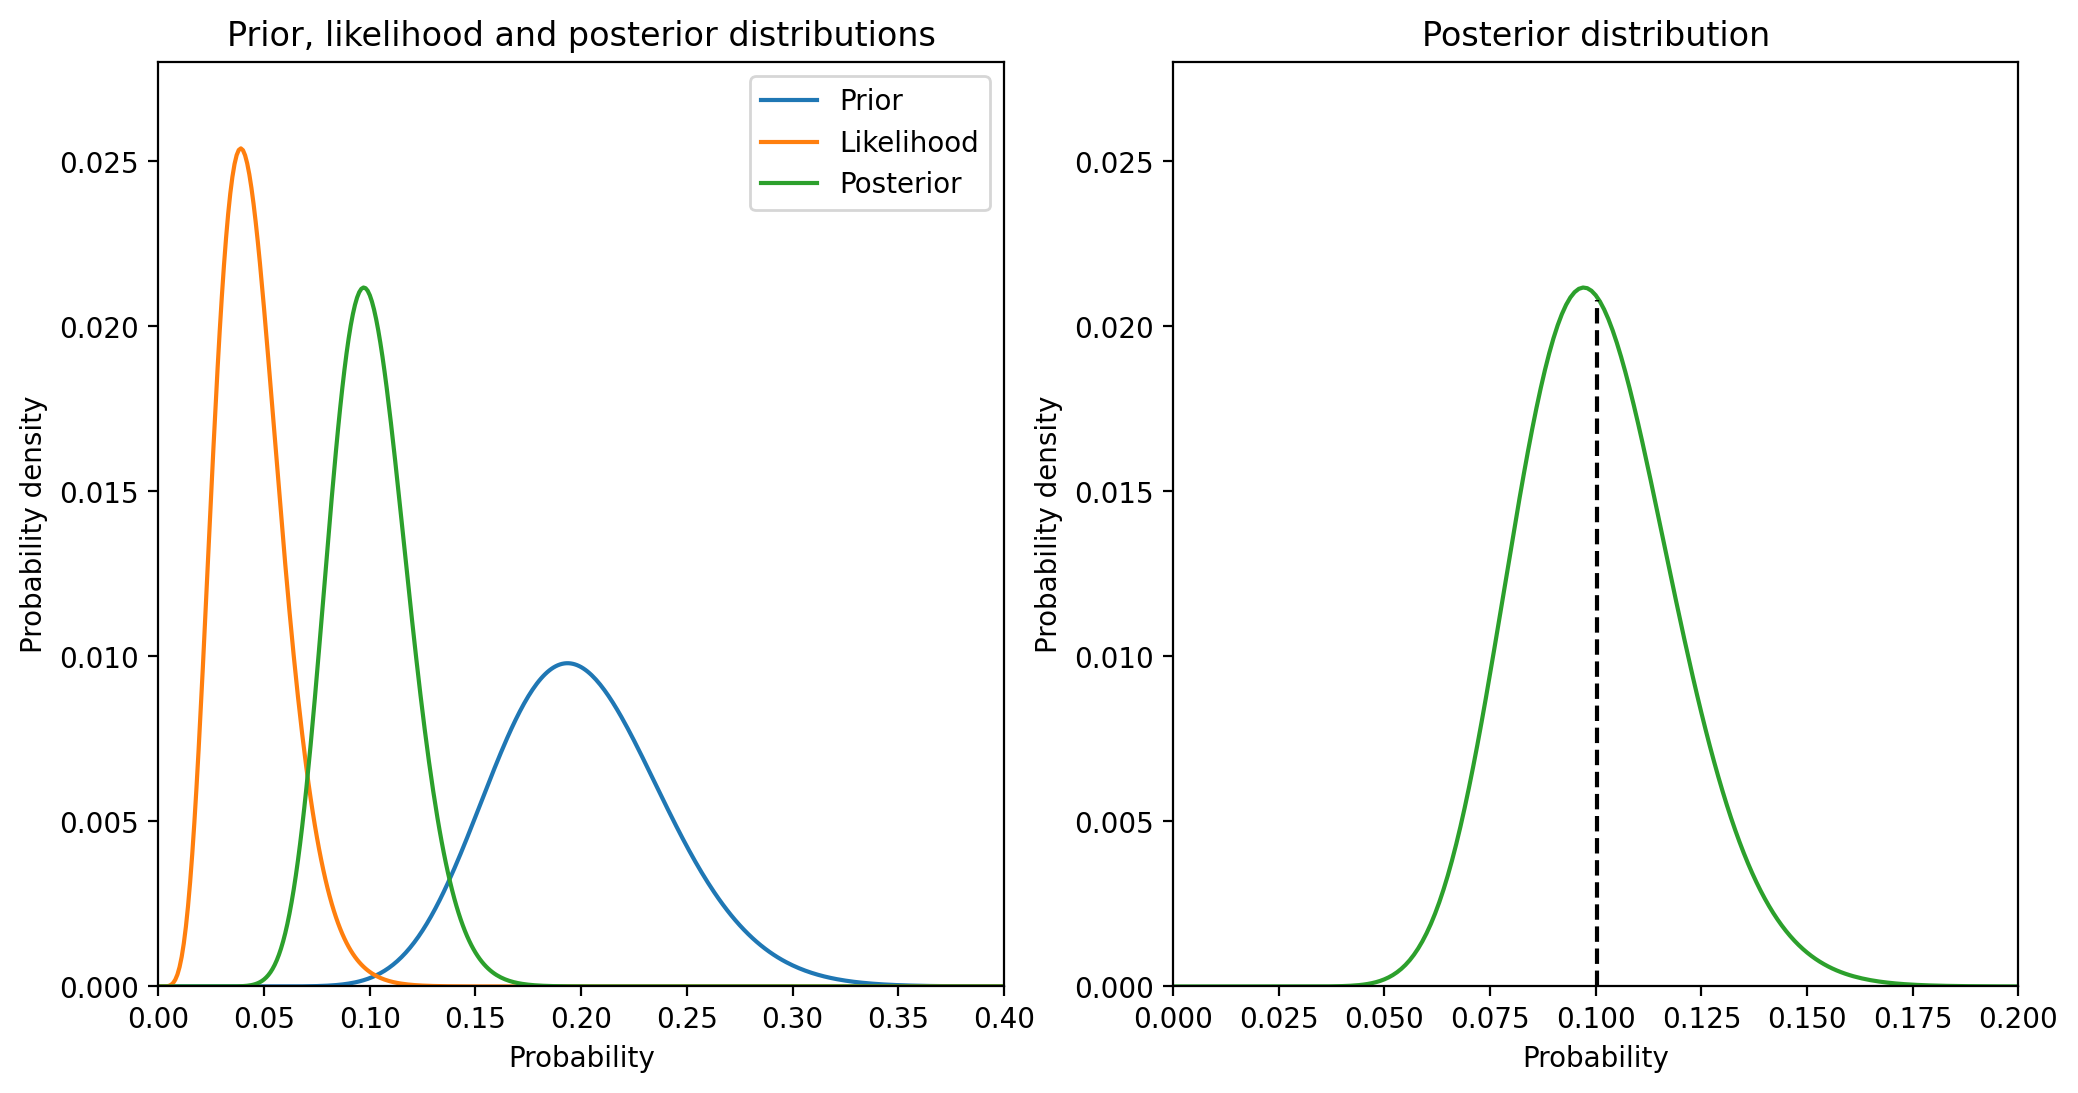

In [186]:
posterior = normalize(prior * likelihood)
posterior_mean = np.sum(posterior * xs)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(xs, prior, label='Prior')
axs[0].plot(xs, likelihood, label='Likelihood')
axs[0].plot(xs, posterior, label='Posterior')

axs[1].plot(xs, posterior, color='C2')
axs[1].vlines(posterior_mean, 0, 0.0208, linestyle='--', color='black')

axs[0].set_xlim(0, 0.4)
axs[0].set_ylim(0, 0.028)

axs[1].set_xlim(0, 0.2)
axs[1].set_ylim(0, 0.028)

axs[0].set_xlabel('Probability')
axs[0].set_ylabel('Probability density')
axs[0].set_title('Prior, likelihood and posterior distributions')

axs[1].set_xlabel('Probability')
axs[1].set_ylabel('Probability density')
axs[1].set_title('Posterior distribution')

axs[0].legend()

plt.show()

As we see from the figures above the mean posterior probability of an abdominal injury is about 0.1 given a clean CT scan.

### Conclusion

This example shows that the prior or pre-test probability have a impact on the posterior probability even if the diagnostic method used have very high sensitivity.

There are numerous sources of error in this example including safer cars in recent years, missing information of the clinical significance of the missed injuries and uncertainty of whether spinal injuries are included in the abdominal injury cathegory in *Yoong et al.* (2).

Nevertheless it serves as an example of how to use bayesian statistics to make estimations from existing data regarding everyday clinical situations.

### Authors
* Athored by Fredrik Lilja in April 2025

### References
1. Rabinovici R, Ovadia P, Mathiak G, Abdullah F. Abdominal injuries associated with lumbar spine fractures in blunt trauma. Injury. 1999 Sep;30(7):471-4. doi: 10.1016/s0020-1383(99)00134-5. PMID: 10707214.

2. Yoong S, Kothari R, Brooks A. Assessment of sensitivity of whole body CT for major trauma. Eur J Trauma Emerg Surg. 2019 Jun;45(3):489-492. doi: 10.1007/s00068-018-0926-7. Epub 2018 Mar 8. PMID: 29520416.